<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Decision_Tree_Real_Data_Claude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset information:
Number of samples: 20640
Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

Feature statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631

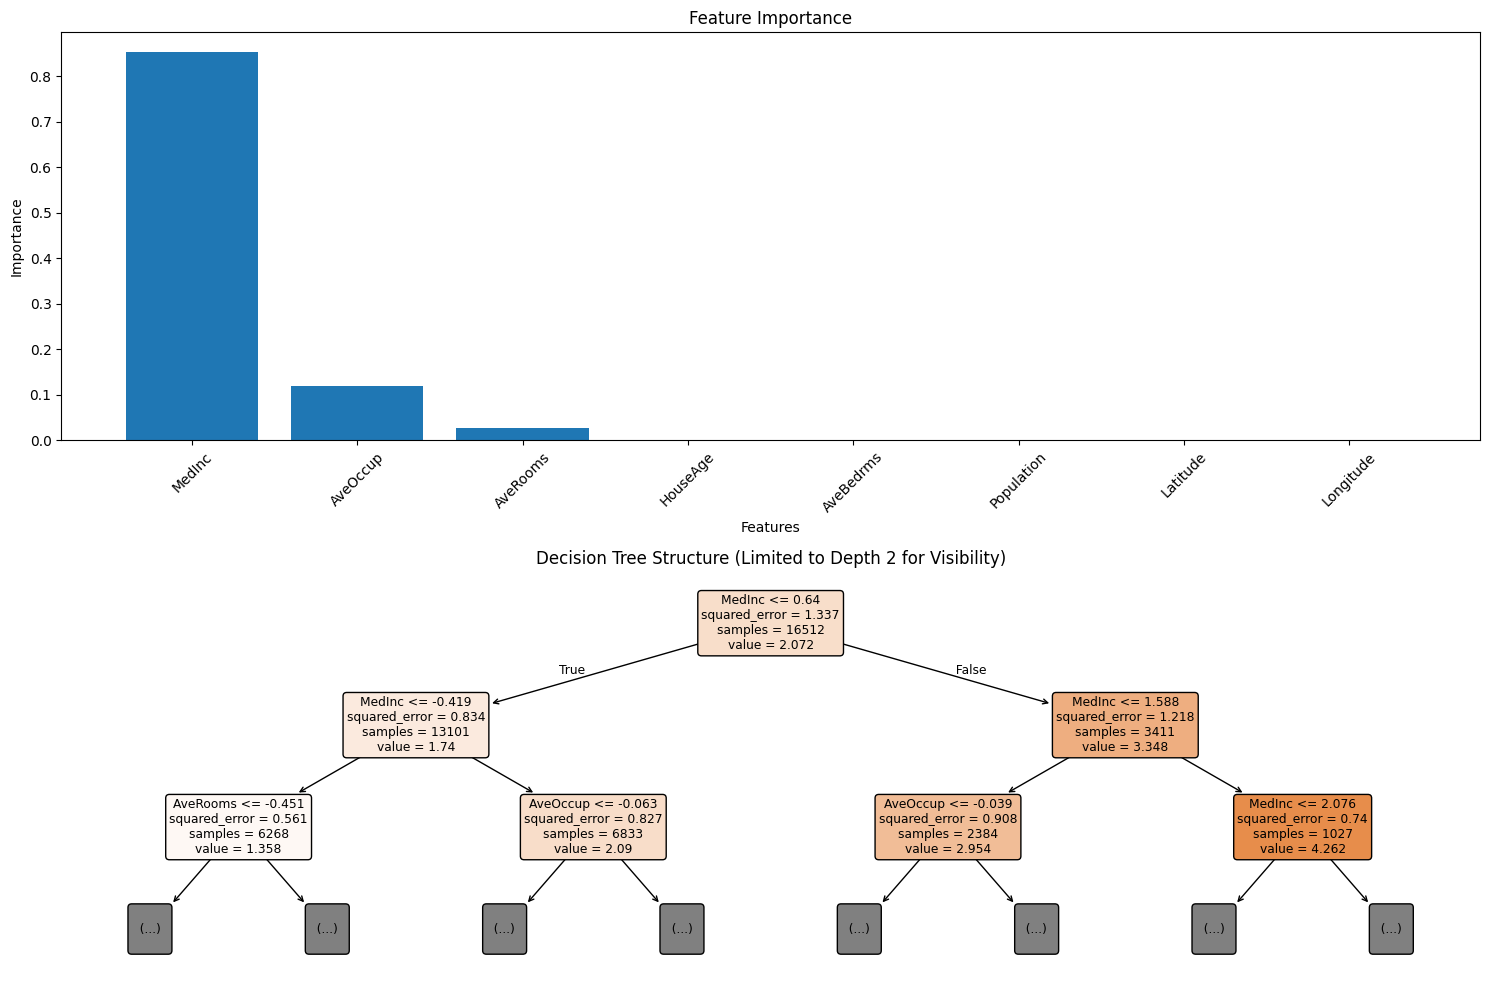


R-squared score: 0.5098

Top 3 most important features:
 feature  importance
  MedInc    0.853800
AveOccup    0.118929
AveRooms    0.027271

Sample of Actual vs Predicted values:
    Actual  Predicted
0  0.47700   1.625823
1  0.45800   1.165120
2  5.00001   2.735653
3  2.18600   2.635562
4  2.78000   1.866884
5  1.58700   1.866884
6  1.98200   1.866884
7  1.57500   1.866884
8  3.40000   2.735653
9  4.46600   4.576738


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
# Option 1: Load from CSV file
# df = pd.read_csv('your_data.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# Option 2: Using sample dataset from sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Print dataset info
print("Dataset information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Features: {', '.join(X.columns)}")
print("\nFeature statistics:")
print(X.describe())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the model
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate R-squared score
r2_score = regressor.score(X_test, y_test)

# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': regressor.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Feature Importance
plt.subplot(2, 1, 1)
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Plot 2: Tree visualization
plt.subplot(2, 1, 2)
plot_tree(regressor, filled=True, feature_names=list(X.columns), rounded=True, max_depth=2)
plt.title('Decision Tree Structure (Limited to Depth 2 for Visibility)')

plt.tight_layout()
plt.show()

# Print model performance and top features
print(f"\nR-squared score: {r2_score:.4f}")
print("\nTop 3 most important features:")
print(feature_importance.head(3).to_string(index=False))

# Optional: Show actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).head(10)
print("\nSample of Actual vs Predicted values:")
print(comparison_df)